<center><h1>Guan_Haoyu_HW4</h1></center>
<br>
<br>

Name: Haoyu Guan
<br>
Github Username: ghyharry
<br>
USC ID: 7418934031

I want to use 2 late days

## 1. Time Series Classification Part 1: Feature Creation/Extraction (HW3 Rerun)

### (a) Obtain Data

Import packages

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import statistics
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
from scipy.stats import norm 
from scipy.stats import bootstrap 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
import warnings

C:\Users\guanh\anaconda3\envs\myenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Get the AReM Data Set

In [2]:
path = '../data/AReM/'
folders = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
dfs = {}
for folder in folders:
    files = glob.glob(path + folder+ '/*csv')
    #print(files)
    thefolder={}
    temp=0
    for file in files:
        temp+=1
        file = file.replace('\\', '/')
        #print(file)
        df = pd.read_csv(file, skiprows=4, index_col='# Columns: time')
        thefolder['dataset'+str(temp)] = df
        
    dfs[folder] = df
#dfs

### (b) Splitting Data

In [3]:
trainf=[]
testf=['../data/AReM/bending1/dataset1.csv','../data/AReM/bending1/dataset2.csv',
                    '../data/AReM/bending2/dataset1.csv','../data/AReM/bending2/dataset2.csv',
                    '../data/AReM/cycling/dataset1.csv','../data/AReM/cycling/dataset2.csv','../data/AReM/cycling/dataset3.csv',
                    '../data/AReM/lying/dataset1.csv','../data/AReM/lying/dataset2.csv','../data/AReM/lying/dataset3.csv',
                    '../data/AReM/sitting/dataset1.csv','../data/AReM/sitting/dataset2.csv','../data/AReM/sitting/dataset3.csv',
                    '../data/AReM/standing/dataset1.csv','../data/AReM/standing/dataset2.csv','../data/AReM/standing/dataset3.csv',
                    '../data/AReM/walking/dataset1.csv','../data/AReM/walking/dataset2.csv','../data/AReM/walking/dataset3.csv']
for folder in folders:
    files = glob.glob(path + folder+ '/*csv')
    #print(files)
    thefolder={}
    temp=0
    for file in files:
        temp+=1
        file = file.replace('\\', '/')
        if file not in testf:
            trainf.append(file)
        
traindf = pd.concat([pd.read_csv(f, skiprows = 4,index_col='# Columns: time') for f in trainf]) 
testdf = pd.concat([pd.read_csv(f, skiprows = 4,index_col='# Columns: time') for f in testf])
testdf

avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
# Columns: time                                                          
0                    39.25       0.43      22.75       0.43      33.75   
250                  39.25       0.43      23.00       0.00      33.00   
500                  39.25       0.43      23.25       0.43      33.00   
750                  39.50       0.50      23.00       0.71      33.00   
1000                 39.50       0.50      24.00       0.00      33.00   
...                    ...        ...        ...        ...        ...   
118750               36.00       2.45      17.00       5.10      20.50   
119000               34.33       1.89      15.00       2.45      17.00   
119250               33.00       7.35      14.60       3.14      13.00   
119500               31.67       1.25      11.00       6.16      19.25   
119750               30.75      10.21      11.75       1.09      18.50   

                 var_rss23  
# Columns: time             
0                     1.30  
250                   0.00  
500                   0.00  
750                   0.00  
1000                  0.00  
...                    ...  
118750                0.87  
119000                2.12  
119250                5.70  
119500                2.17  
119750                3.20  

[9120 rows x 6 columns]

### (c) Feature Extraction

In [4]:
files=trainf+testf

table = []
for file in files:
    df = pd.read_csv(file, skiprows = 4)
    df = df.describe().drop('count').drop(columns = '# Columns: time').T
    df = df[['min','max', 'mean', '50%', 'std', '25%', '75%']]
    #print(df)
    dataset = df.values.reshape(1, -1)
    dataset = pd.DataFrame(dataset)
    table.append(dataset)
features = pd.concat(table)

names = []
for i in range(1, 7):
    names.extend(['min' + str(i), 'max' + str(i), 'mean' + str(i), 'median' + str(i),'standard deviation' + str(i), '1st quartile' + str(i), '3rd quartile' + str(i)])

features.columns = names
#print(features)
features.index = np.arange(1, 89)
features.index.name = 'Instance'

features

min1   max1      mean1  median1  standard deviation1  \
Instance                                                          
1         35.00  47.40  43.954500   44.330             1.558835   
2         33.00  47.75  42.179813   43.500             3.670666   
3         33.00  45.75  41.678063   41.750             2.243490   
4         37.00  48.00  43.454958   43.250             1.386098   
5         36.25  48.00  43.969125   44.500             1.618364   
...         ...    ...        ...      ...                  ...   
84        35.50  46.25  43.174938   43.670             1.989052   
85        32.75  47.00  42.760563   44.500             3.398919   
86        19.33  43.50  34.227771   35.500             4.889576   
87        12.50  45.00  33.509729   34.125             4.850923   
88        15.00  46.75  34.660583   35.000             5.315110   

          1st quartile1  3rd quartile1  min2   max2     mean2  ...  \
Instance                                                       ...   
1                 43.00        45.0000   0.0   1.70  0.426250  ...   
2                 39.15        45.0000   0.0   3.00  0.696042  ...   
3                 41.33        42.7500   0.0   2.83  0.535979  ...   
4                 42.50        45.0000   0.0   1.58  0.378083  ...   
5                 43.31        44.6700   0.0   1.50  0.413125  ...   
...                 ...            ...   ...    ...       ...  ...   
84                42.50        44.5000   0.0   2.12  0.506583  ...   
85                41.33        45.3725   0.0   3.34  0.486167  ...   
86                30.50        37.7500   0.0  14.50  3.995729  ...   
87                30.50        36.7500   0.0  13.05  4.450771  ...   
88                31.00        38.2500   0.0  13.44  4.200896  ...   

          standard deviation5  1st quartile5  3rd quartile5  min6  max6  \
Instance                                                                  
1                    1.999604        35.3625         36.500   0.0  1.79   
2                    3.849448        30.4575         36.330   0.0  2.18   
3                    2.411026        28.4575         31.250   0.0  1.79   
4                    2.488862        22.2500         24.000   0.0  5.26   
5                    3.318301        20.5000         23.750   0.0  2.96   
...                       ...            ...            ...   ...   ...   
84                   2.983976        12.7500         16.500   0.0  5.72   
85                   4.296574        13.0000         18.565   0.0  5.73   
86                   3.092094        14.7500         18.670   0.0  9.74   
87                   3.133564        14.6275         18.750   0.0  8.96   
88                   3.155015        14.2500         18.500   0.0  8.99   

             mean6  median6  standard deviation6  1st quartile6  3rd quartile6  
Instance                                                                        
1         0.493292    0.430             0.513506          0.000          0.940  
2         0.613521    0.500             0.524317          0.000          1.000  
3         0.383292    0.430             0.389164          0.000          0.500  
4         0.679646    0.500             0.622534          0.430          0.870  
5         0.555313    0.490             0.487826          0.000          0.830  
...            ...      ...                  ...            ...            ...  
84        0.911979    0.830             0.666161          0.470          1.220  
85        0.842271    0.710             0.722165          0.430          1.090  
86        3.394125    3.100             1.792090          2.105          4.425  
87        3.378479    3.085             1.787360          2.060          4.440  
88        3.244396    3.000             1.630983          2.120          4.240  

[88 rows x 42 columns]

In [5]:
lower = []
upper = []

for each in features.columns:
    bsr = bs.bootstrap(np.array(features[each]), stat_func = bs_stats.std, alpha = 0.1)
    #res = bootstrap(np.array(features[each]), np.std, confidence_level = 0.9, random_state = 4, method = 'percentile')
    
    lower.append(bsr.lower_bound)
    upper.append(bsr.upper_bound)

stdCI = pd.DataFrame({'std Estimate': features.describe().T['std'], '90% confidence interval lower': lower, '90% confidence interval upper': upper})
stdCI.index.name = 'feature'
stdCI

std Estimate  90% confidence interval lower  \
feature                                                            
min1                     9.569975                       8.331240   
max1                     4.394362                       3.495303   
mean1                    5.335718                       4.757399   
median1                  5.440054                       4.845478   
standard deviation1      1.772153                       1.587390   
1st quartile1            6.153590                       5.624844   
3rd quartile1            5.138925                       4.413101   
min2                     0.000000                       0.000000   
max2                     5.062729                       4.695569   
mean2                    1.574164                       1.435596   
median2                  1.412244                       1.272354   
standard deviation2      0.884105                       0.821178   
1st quartile2            0.946386                       0.852140   
3rd quartile2            2.125266                       1.944841   
min3                     2.956462                       2.788803   
max3                     4.875137                       4.242608   
mean3                    4.008380                       3.499124   
median3                  4.036396                       3.515829   
standard deviation3      0.946710                       0.768691   
1st quartile3            4.220658                       3.713743   
3rd quartile3            4.171628                       3.630989   
min4                     0.000000                       0.000000   
max4                     2.183625                       1.992370   
mean4                    1.166114                       1.103723   
median4                  1.145586                       1.083712   
standard deviation4      0.458242                       0.427783   
1st quartile4            0.843620                       0.791543   
3rd quartile4            1.552504                       1.469362   
min5                     6.124001                       4.702269   
max5                     5.741238                       4.885381   
mean5                    5.675593                       4.590639   
median5                  5.813782                       4.681655   
standard deviation5      1.024898                       0.829104   
1st quartile5            6.096465                       4.983392   
3rd quartile5            5.531720                       4.518488   
min6                     0.045838                       0.013125   
max6                     2.518921                       2.262594   
mean6                    1.154812                       1.087605   
median6                  1.086474                       1.019357   
standard deviation6      0.517617                       0.487117   
1st quartile6            0.758584                       0.705676   
3rd quartile6            1.523599                       1.438459   

                     90% confidence interval upper  
feature                                             
min1                                     10.828820  
max1                                      5.411911  
mean1                                     5.929437  
median1                                   6.043642  
standard deviation1                       1.964341  
1st quartile1                             6.701136  
3rd quartile1                             5.922430  
min2                                      0.000000  
max2                                      5.468997  
mean2                                     1.742731  
median2                                   1.581160  
standard deviation2                       0.962031  
1st quartile2                             1.058209  
3rd quartile2                             2.338929  
min3                                      3.133338  
max3                                      5.555242  
mean3                                     4.573416  
median3              

## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

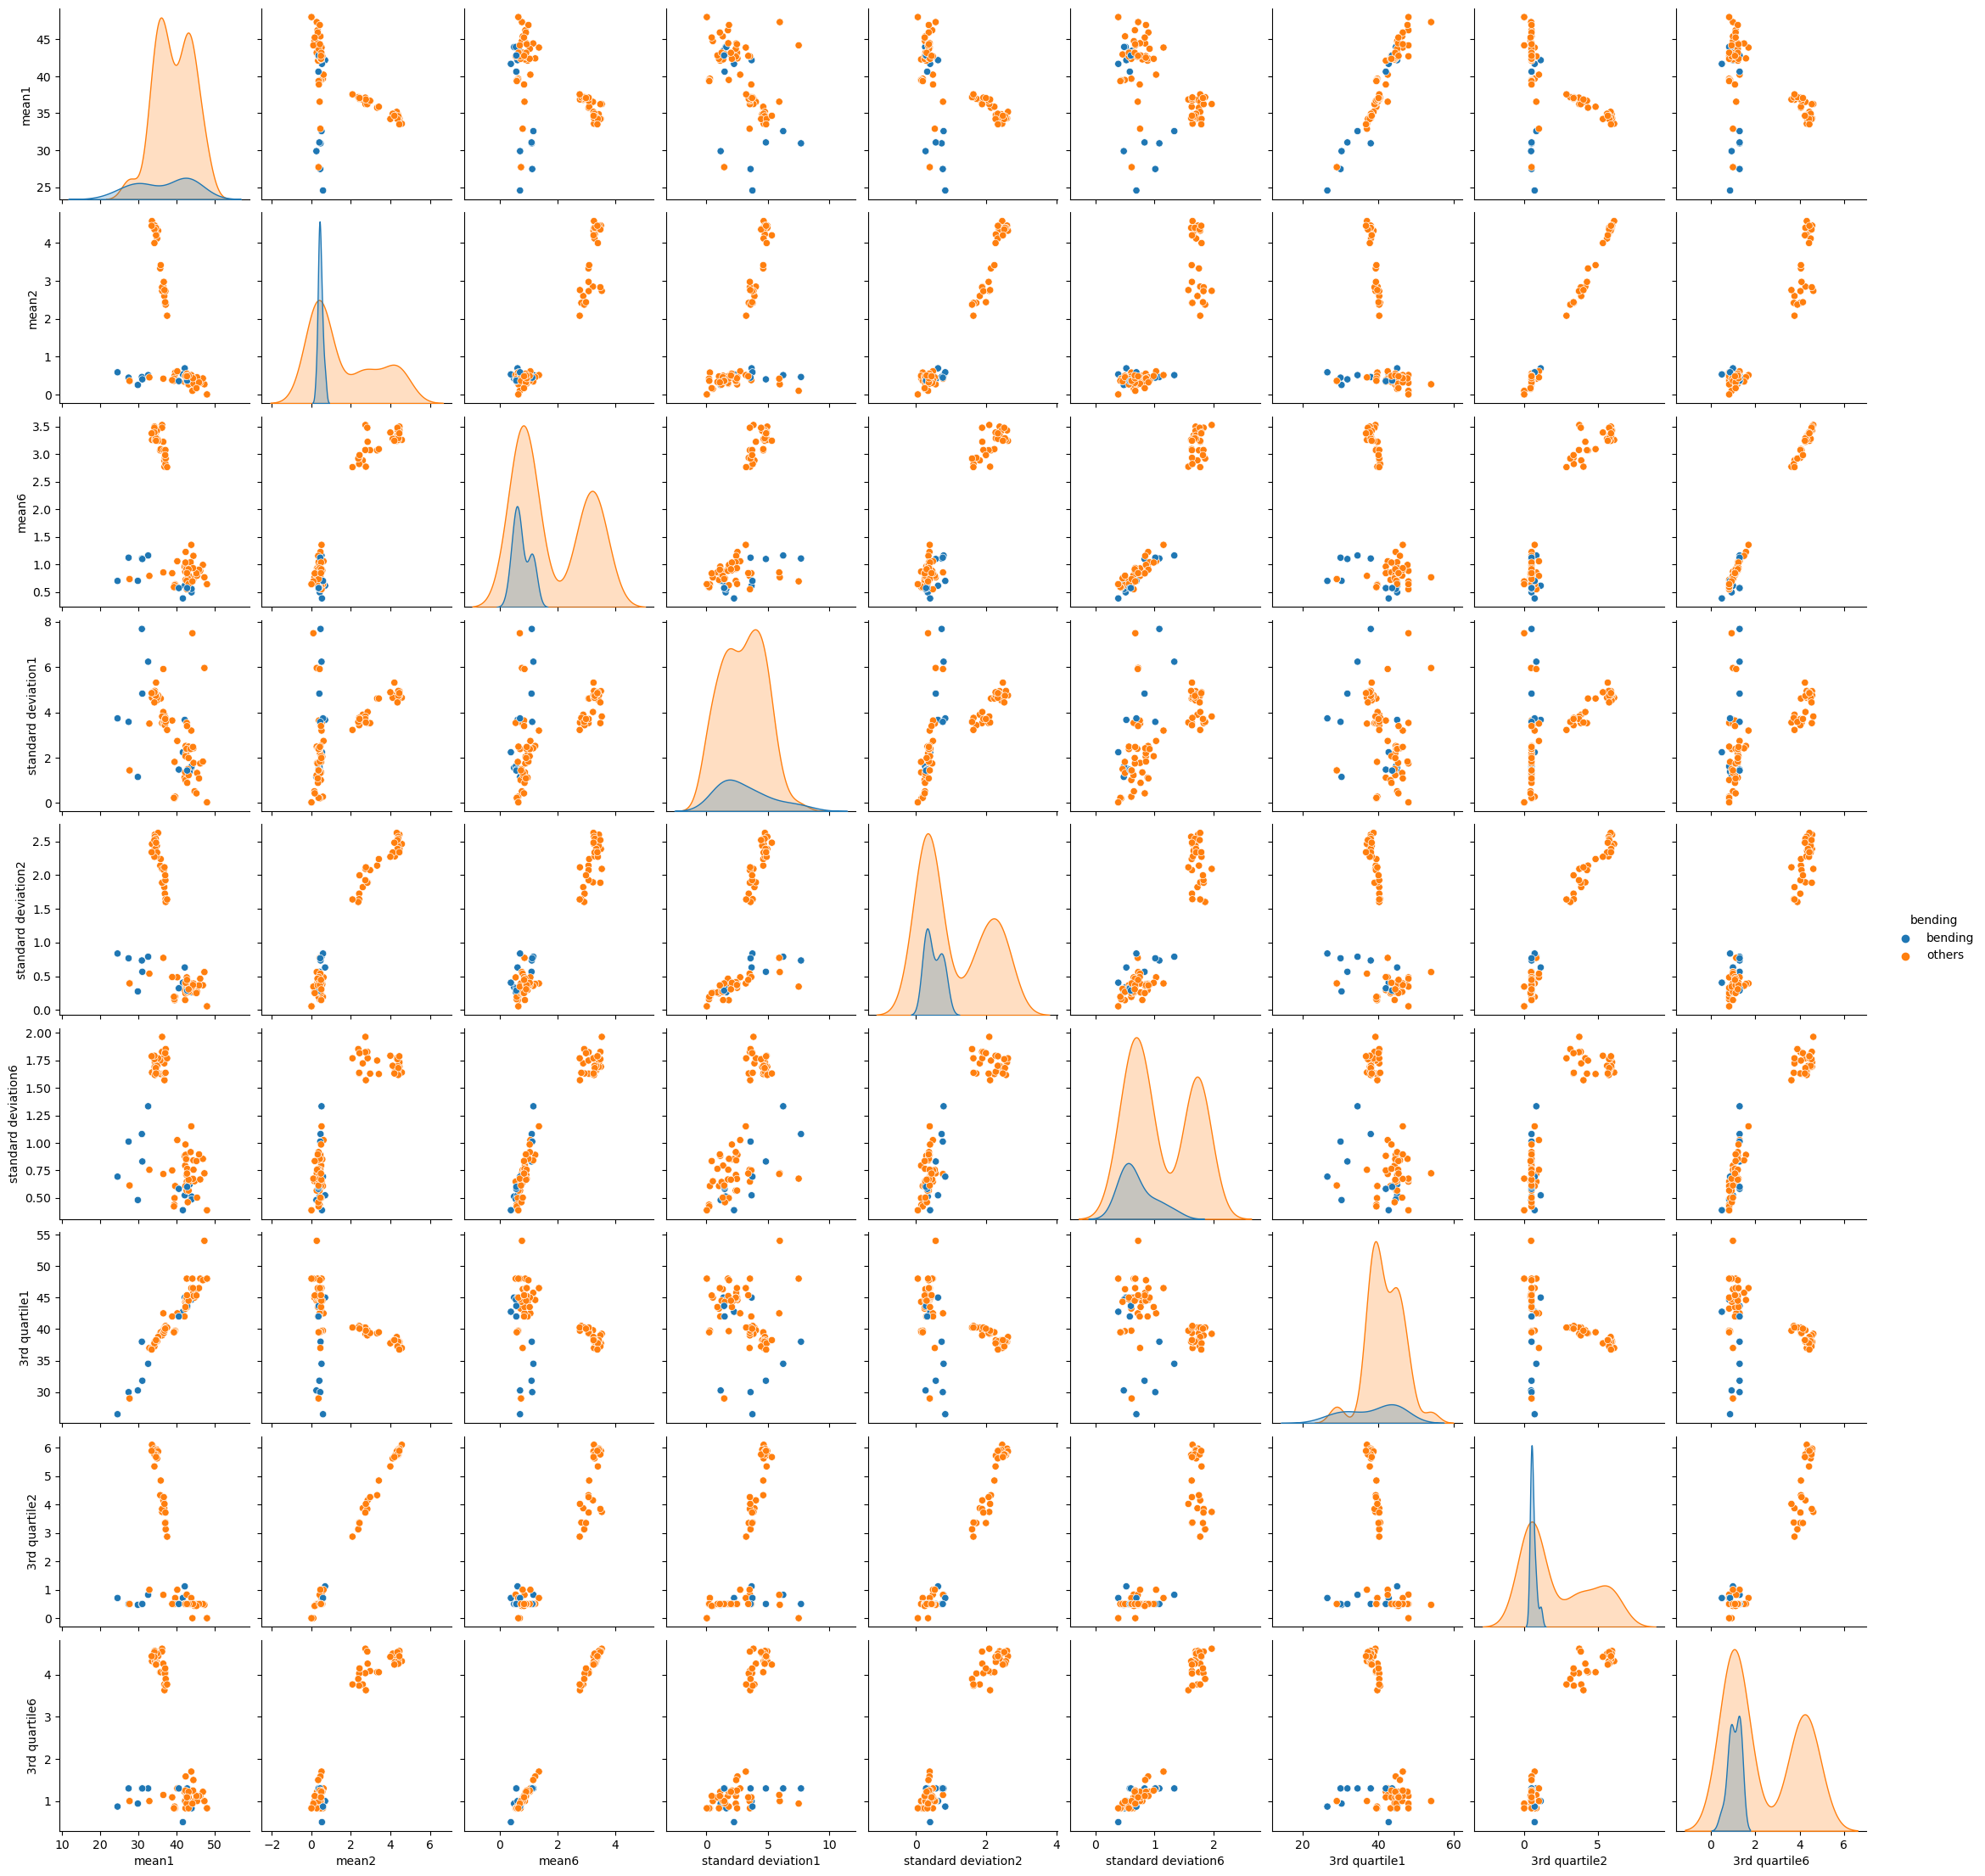

In [14]:
selectfeature = features.loc[:, ["mean1", "mean2", "mean6", "standard deviation1", "standard deviation2", "standard deviation6", "3rd quartile1", "3rd quartile2", "3rd quartile6"]]

bendlabel = ["bending" if "bending" in f else "others" for f in trainf + testf]
selectfeature.loc[:, "bending"] = bendlabel
sns.pairplot(data = selectfeature, hue = "bending")
plt.show()

#### ii. Splitted Plots

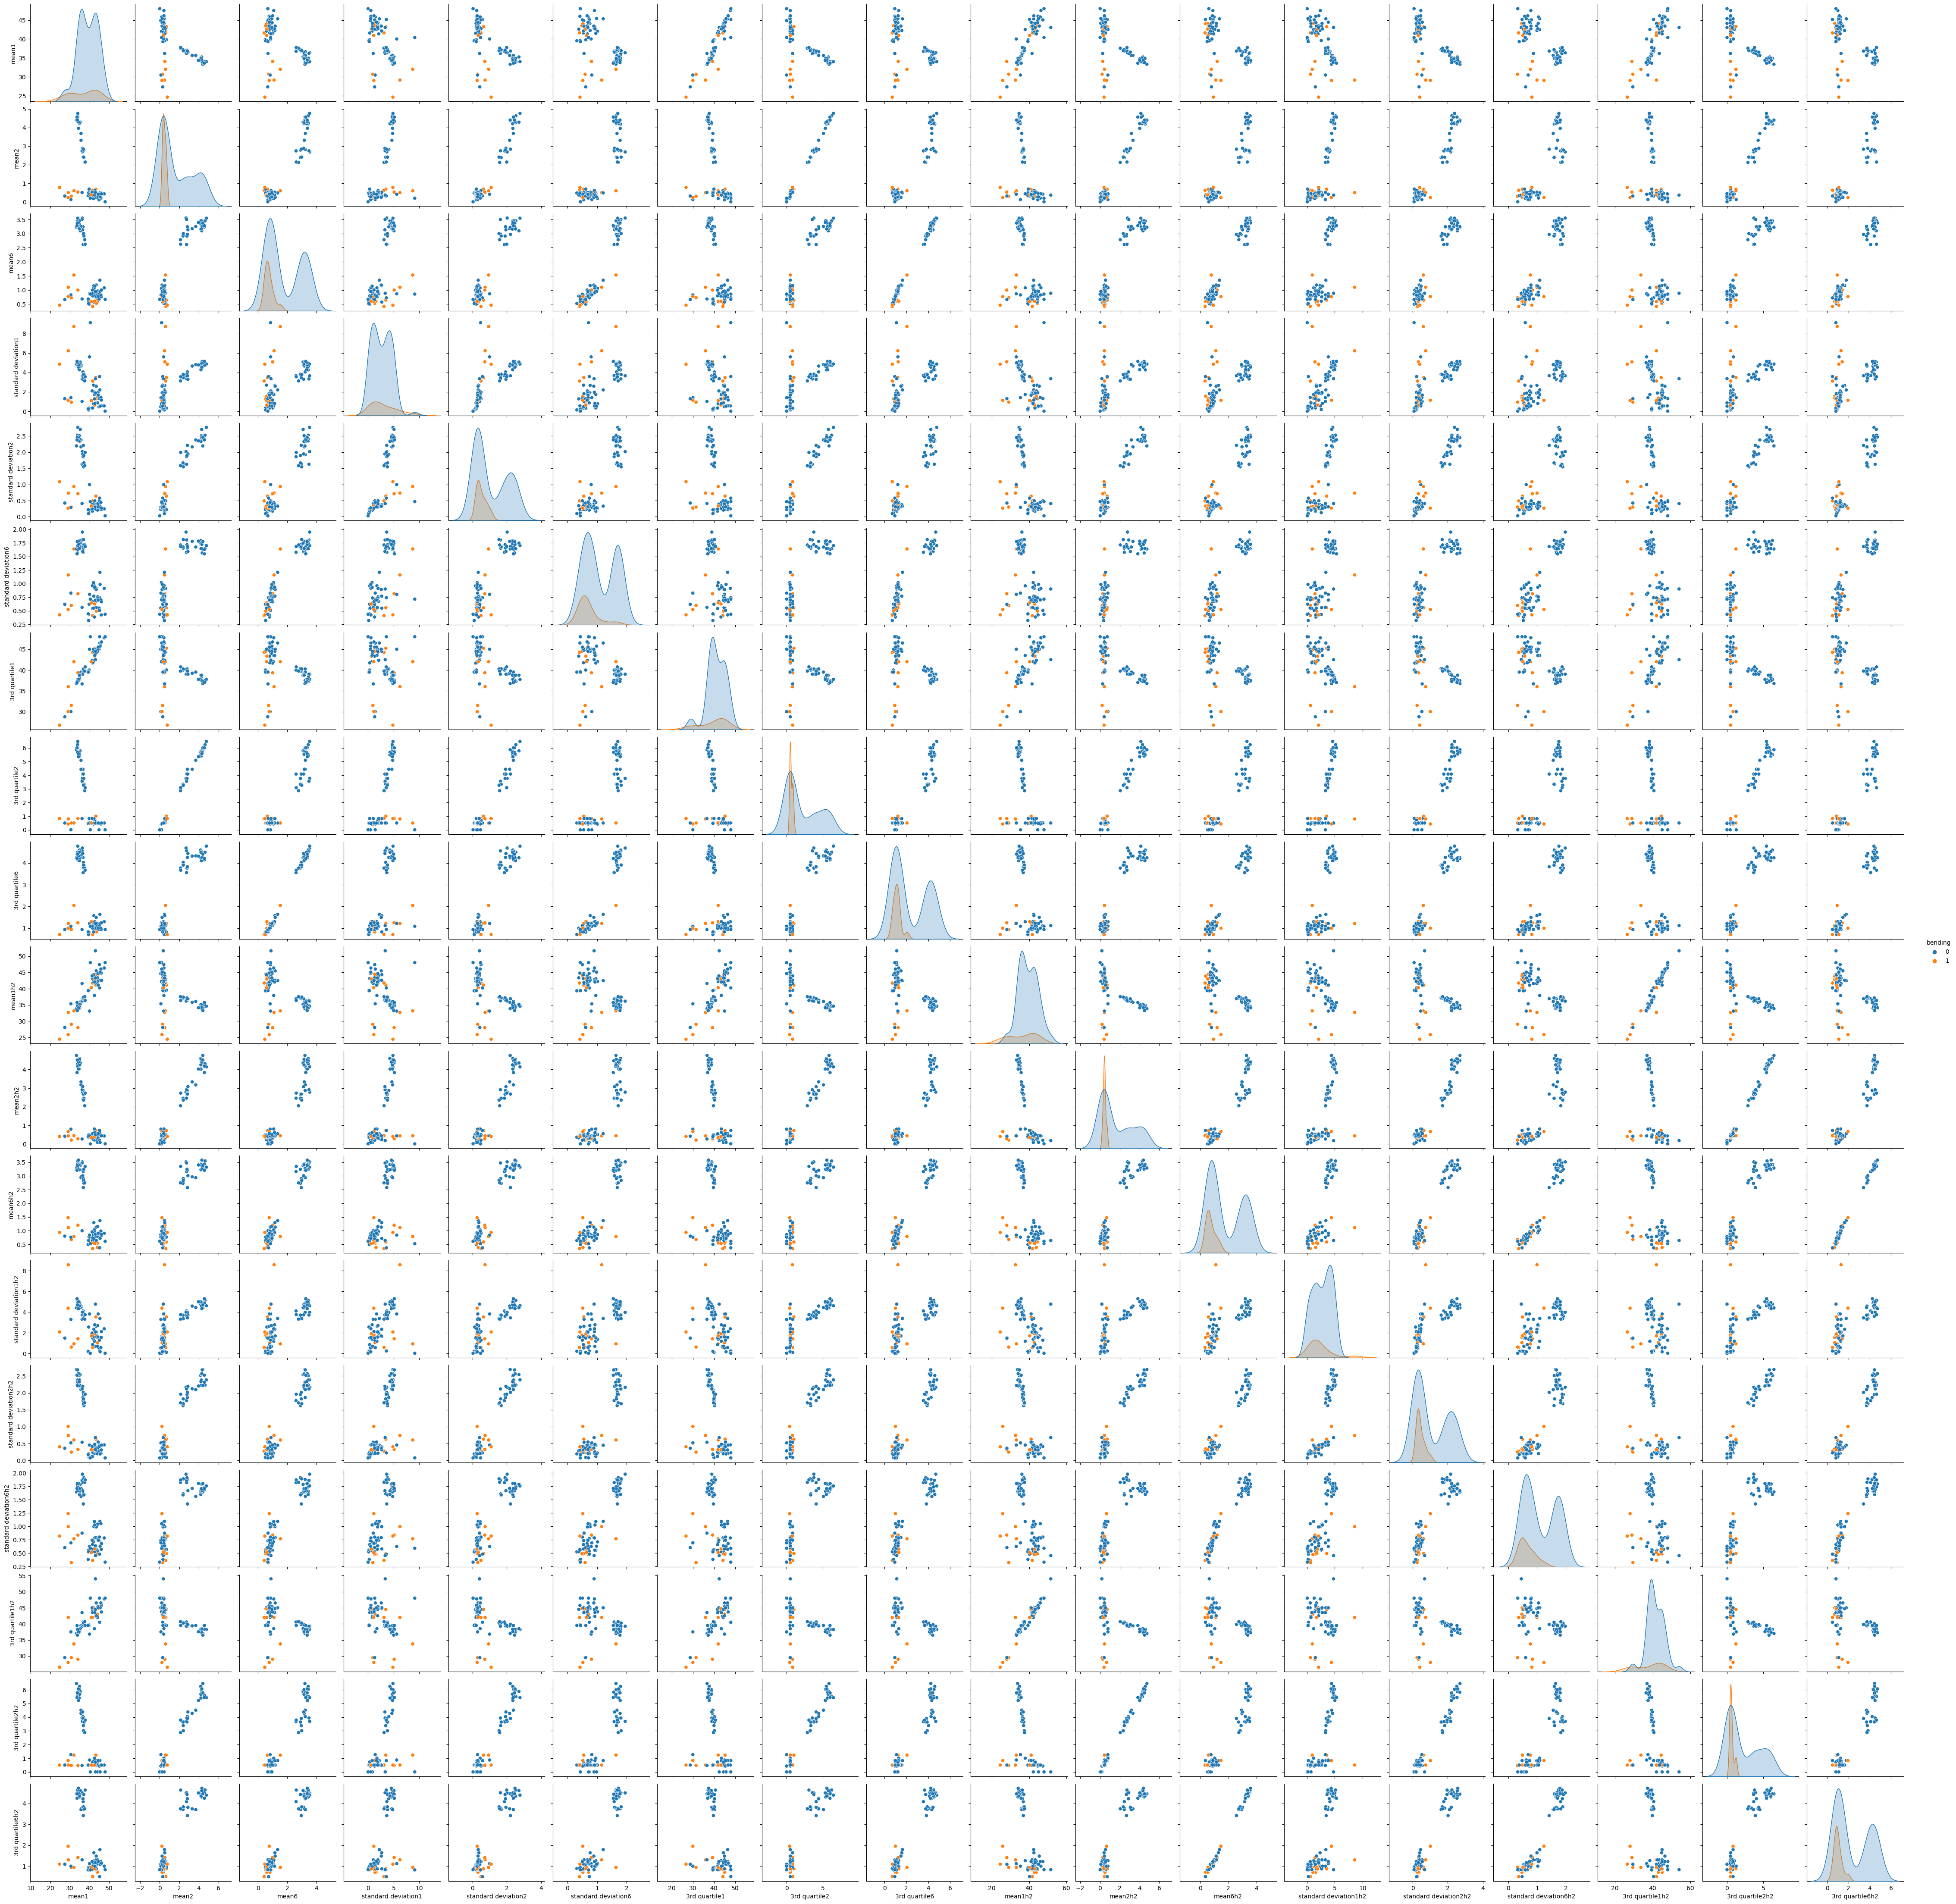

In [15]:
table = []
for file in files:
    df = pd.read_csv(file, skiprows = 4)
    half = df.shape[0]//2
    dfhalf = df.loc[0: half]
    dfhalf = dfhalf.describe().drop('count').drop(columns = '# Columns: time').T
    dfhalf = dfhalf[['min','max', 'mean', '50%', 'std', '25%', '75%']]
    #print(df)
    dataset = dfhalf.values.reshape(1, -1)
    dataset1 = pd.DataFrame(dataset)
    
    
    dfhalf = df.loc[half: df.shape[0]]
    dfhalf = dfhalf.describe().drop('count').drop(columns = '# Columns: time').T
    dfhalf = dfhalf[['min','max', 'mean', '50%', 'std', '25%', '75%']]
    #print(df)
    dataset = dfhalf.values.reshape(1, -1)
    dataset2 = pd.DataFrame(dataset)
    table.append(pd.concat([dataset1,dataset2], axis = 1))
newfeatures = pd.concat(table)

#print(newfeatures)
newfeatures.columns = names + [name + "h2" for name in names]
#print(features)
newfeatures.index = np.arange(1, len(newfeatures) + 1)
newfeatures.index.name = 'Instance'

newselectfeature = newfeatures.loc[:, ["mean1", "mean2", "mean6", "standard deviation1", "standard deviation2", "standard deviation6", "3rd quartile1", "3rd quartile2", "3rd quartile6", "mean1h2", "mean2h2", "mean6h2", "standard deviation1h2", "standard deviation2h2", "standard deviation6h2", "3rd quartile1h2", "3rd quartile2h2", "3rd quartile6h2"]]

bendlabel = [1 if "bending" in f else 0 for f in trainf + testf]
newselectfeature.loc[:, "bending"] = bendlabel
sns.pairplot(data = newselectfeature, hue = "bending")
plt.show()

We can not observe significant difference bewteen the result above and the result in 2ai.

#### iii. Time Series Segments

In [8]:
def splitfeature(k):
    table = []
    for file in files:
        df = pd.read_csv(file, skiprows = 4)
        half = df.shape[0]//k
        iserie=[]
        
        for j in range(0,k):
            
    
            dfhalf = df.loc[half*j: half*(j+1)]
            dfhalf = dfhalf.describe().drop('count').drop(columns = '# Columns: time').T
            dfhalf = dfhalf[['min','max', 'mean', '50%', 'std', '25%', '75%']]
            #print(df)
            dataset = dfhalf.values.reshape(1, -1)
            dataset = pd.DataFrame(dataset)
            iserie.append(dataset)
        table.append(pd.concat(iserie, axis = 1))
    newfeatures = pd.concat(table)

    #print(newfeatures)
    names = []
    for i in range(1, k*6+1):
        names.extend(['min' + str(i), 'max' + str(i), 'mean' + str(i), 'median' + str(i),'standard deviation' + str(i), '1st quartile' + str(i), '3rd quartile' + str(i)])
    newfeatures.columns = names
    #print(features)
    newfeatures.index = np.arange(1, len(newfeatures) + 1)
    newfeatures.index.name = 'Instance'
    return newfeatures

In [9]:
def splitxy(newfeatures):
    xtrain = newfeatures.iloc[0:69].reset_index(drop = True)
    trainb = [1 if "bending" in f else 0 for f in trainf]
    ytrain = pd.DataFrame({"bending": trainb}).reset_index(drop = True)

    xtest = newfeatures.iloc[69:].reset_index(drop = True)
    testb = [1 if "bending" in f else 0 for f in testf]
    ytest = pd.DataFrame({"bending": testb}).reset_index(drop = True)

    return xtrain, ytrain, xtest, ytest

In [10]:
final_accuracy = np.array([])
warnings.filterwarnings('ignore')
for k in range(1, 21):
    newfeatures = splitfeature(k)

    xtrain, ytrain, xtest, ytest = splitxy(newfeatures)
    #print(len(xtrain))
    ytrain=ytrain.to_numpy().flatten()
    lr = LogisticRegression(C=100000 ,max_iter= 20)
    skf = StratifiedKFold(n_splits = 5, shuffle = False)
    #rfecvs = RFECV(lr, cv=skf, scoring='accuracy')
    #rfecvs = rfecvs.fit(xtrain,ytrain.values.ravel())
    #print(rfecvs.cv_results_)
    #print(k,rfecvs.n_features_)
    #print(k,rfecvs.n_features_,np.max(rfecvs.cv_results_['mean_test_score'])) )
    #rfecv has no attribute cv_results_? how?
    accuracy = np.array([])
    for train_index, test_index in skf.split(xtrain , ytrain):
        rfecv = RFECV(estimator = lr,  cv = skf, scoring = 'accuracy')
        fit_rfecv = rfecv.fit(xtrain.loc[train_index], ytrain[train_index])
        
        selected_feat_lst = xtrain.columns[fit_rfecv.support_]
        X = xtrain.loc[train_index][selected_feat_lst]
        X_valid = xtrain.loc[test_index][selected_feat_lst]
       
        fitlr = lr.fit(X, ytrain[train_index])
        y_pred = lr.predict(X_valid)
        accuracy = np.append(accuracy, lr.score(X_valid, ytrain[test_index]))
    print(np.mean(accuracy))
    final_accuracy = np.append(final_accuracy, np.mean(accuracy))
    
final_accuracy

1.0
0.9417582417582417
0.9703296703296704
0.9274725274725275
0.9274725274725275
0.9417582417582417
0.9274725274725275
0.8846153846153847
0.9131868131868133
0.9274725274725275
0.9703296703296704
0.9428571428571428
0.9560439560439562
0.9560439560439562
0.9571428571428571
0.9417582417582417
0.9560439560439562
0.9714285714285715
0.9714285714285715
0.9571428571428571


array([1.        , 0.94175824, 0.97032967, 0.92747253, 0.92747253,
       0.94175824, 0.92747253, 0.88461538, 0.91318681, 0.92747253,
       0.97032967, 0.94285714, 0.95604396, 0.95604396, 0.95714286,
       0.94175824, 0.95604396, 0.97142857, 0.97142857, 0.95714286])

In [13]:
lr = LogisticRegression(C=100000 ,max_iter= 20)
newfeatures = splitfeature(1)

xtrain, ytrain, xtest, ytest = splitxy(newfeatures)
rfecv = RFECV(estimator = lr,  cv = skf, scoring = 'accuracy')
fit_rfecv = rfecv.fit(xtrain,ytrain)
best_features = xtrain.columns[fit_rfecv.support_]
newxtrain = xtrain[best_features]
print("According to above result, best l is 1")
print("Best p is ",  fit_rfecv.n_features_)
print("Best features are", best_features)

According to above result, best l is 1
Best p is  4
Best features are Index(['3rd quartile1', 'min5', 'max5', '1st quartile5'], dtype='object')


The right way is to apply cross validation while do feature selection. The wrong way is selecting features before cross validation.

#### iv. Confusion Matrix

In [24]:
import statsmodels.api as sm
lrsm = sm.add_constant(xtrain[best_features])
lrresults = sm.Logit(np.array(ytrain), lrsm).fit(method='lbfgs')
print(lrresults.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   69
Model:                          Logit   Df Residuals:                       64
Method:                           MLE   Df Model:                            4
Date:                Wed, 18 Oct 2023   Pseudo R-squ.:                   1.000
Time:                        23:31:36   Log-Likelihood:            -0.00010798
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 6.910e-11
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3805   8.43e+05  -4.51e-07      1.000   -1.65e+06    1.65e+06
3rd quartile1    -5.9091   4.14e+04     -0.000      1.000   -8.11e+04    8.11e+04
min5              3.6720   1.64e+04     

all p value < 0.05, we can see as significant

In [25]:
fit_rfecv.fit(xtrain[best_features], ytrain)
lrscore = fit_rfecv.score(xtrain[best_features], ytrain)
print(lrscore)
lryhat = fit_rfecv.predict(xtrain[best_features])

1.0


In [26]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
lrmatrix = confusion_matrix(ytrain, np.round(lryhat))
print(lrmatrix)

[[60  0]
 [ 0  9]]


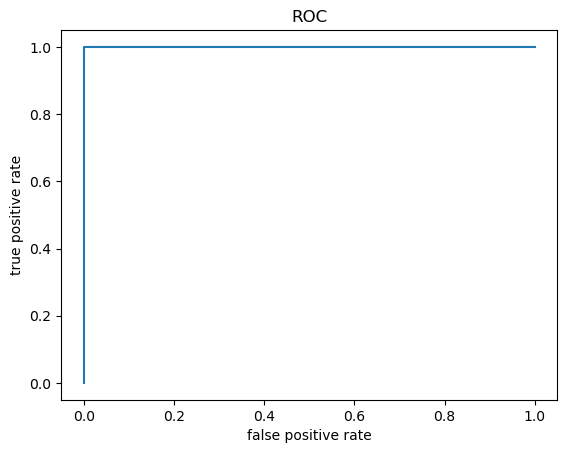

In [29]:
fpr, tpr, _ = roc_curve(ytrain, lryhat)
plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ROC")
plt.show()

#### v. Test Classifier

In [30]:
ytest=ytest.to_numpy().flatten()
testyhat = fit_rfecv.predict(xtest[best_features])
testscore = fit_rfecv.score(xtest[best_features], ytest)
print(testscore)

1.0


In [31]:
testmatrix = confusion_matrix(ytest, np.round(testyhat))
print(testmatrix)

[[15  0]
 [ 0  4]]


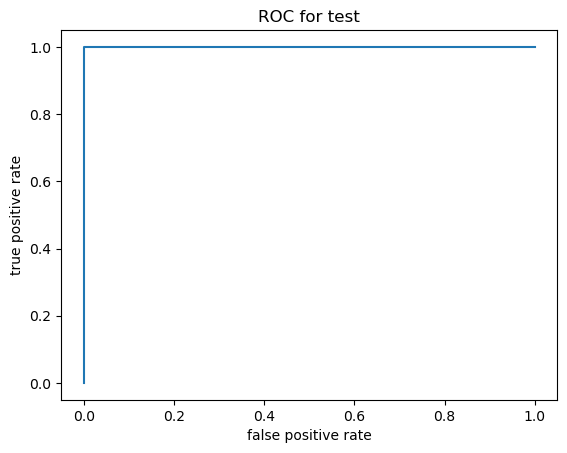

In [32]:
fpr, tpr, _ = roc_curve(ytest, testyhat)
plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ROC for test")
plt.show()

#### vi. Separation

Yes, my classes seem to be well-separated to cause instability in calculating logistic regression.

#### vii. Imbalance

### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

#### ii. Comparison

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

#### ii. Naive Bayes

#### ii. Comparison

## 3. ISLR 4.8.3

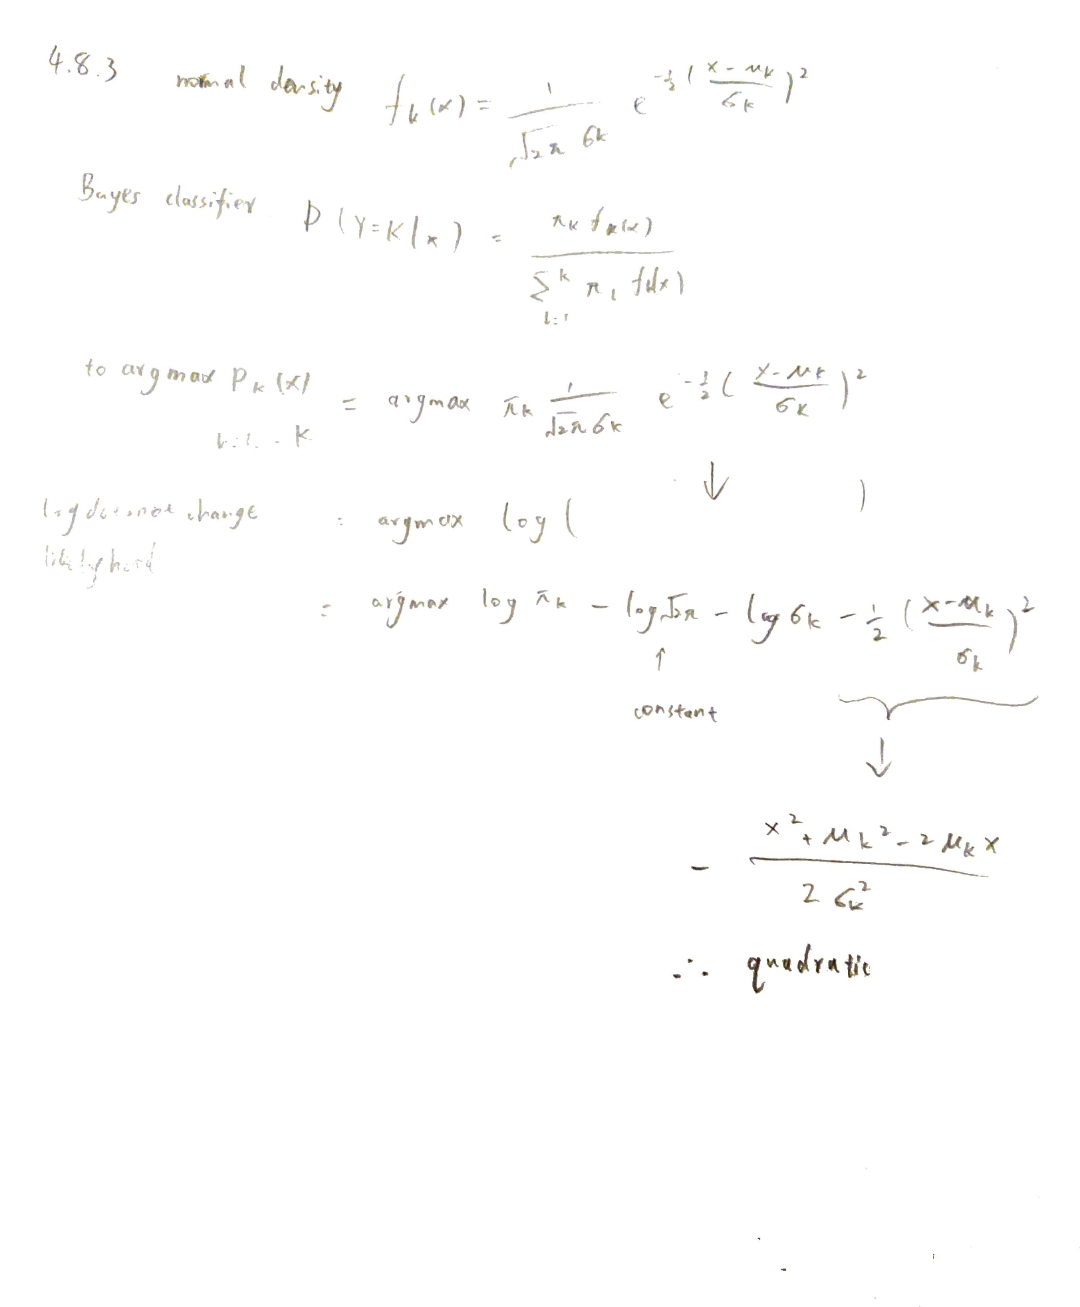

## 4. ISLR 4.8.7

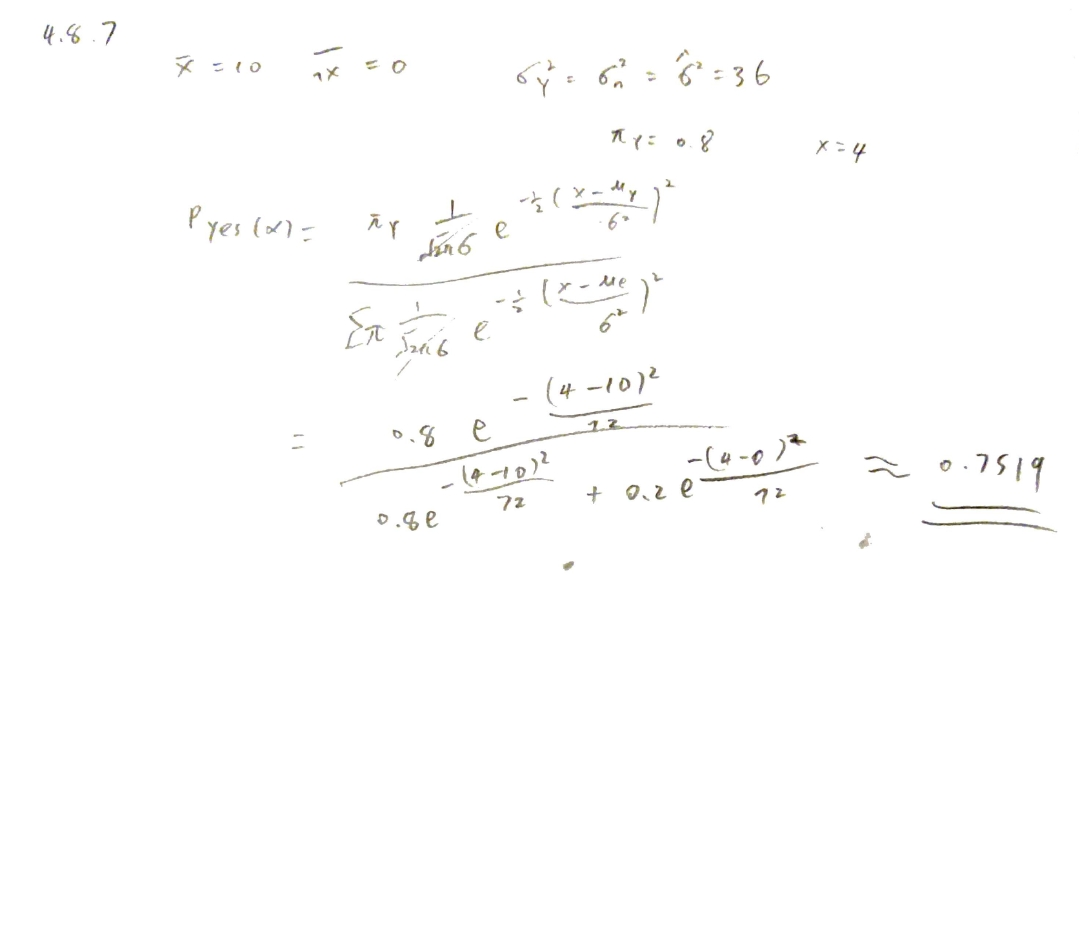

## 5.1. Extra Practice ISLR 4.8.4

## 5.2. Extra Practice ISLR 4.8.9

reference
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html